# Data Science Methods for Clean Energy Research 
## _Unsupervised Machine Learning_

## Outline

### 1. Principal Component Analysis
### 2. K-means clustering

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 18})

import pandas as pd 
import random

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### 1. Principal Component Analysis

### 1.1 What is PCA?

PCA finds a low-dimensional representation of a high-dimensional dataset 

$$X = \left\{X_1,X_2,...,X_p\right\}$$

which contains as much of the information as possible on the high-dimensional dataset. 

The low-dimensional representation will have dimensions $n<p$ where $p$ the number of input features also represents the dimensions of the dataset to some extent.

* Each of the $n$ low-dimensional components can be written as a linear combination of the input features
* All low-dimensional components are uncorrelated which also means, in this case, that they are orthogonal


Some **applications of PCA:**

* Reducing dimensionality
* Accelerating ML methods ( finding optimal features )


The **first** principal component of our set of features $X = \left\{X_1,X_2,...,X_p\right\}$ is the linear combination

$$Z_1 = \phi_{11}X_1 \,+\, \phi_{21}X_2 \,+\, ...\,+\,\phi_{p1}X_p$$

which has the largest variance. The coefficients $\left\{\phi_{1,i}\right\}_{i=1}^{p}$ are called _loadings_ of the first principal component. The _loadings_ are such that $Z_1$ is normalized, i.e. $\sum_i^p\phi_{i,1}^2=1$

The **second** principal component is the direction which maximizes variance among all directions orthogonal to the first. 

The $k$-th component is the variance-maximizing direction orthogonal to the previous $k − 1$ components.


### 1.2 The PCA optimization problem

**How do we find these _loadings_** with the constraint of largest variance?

Let's say you are given a data set $X$ of $n_{pts}$ examples, i.e. of size $n_{pts}\times p$, and want to find

$$z_{i1} = \phi_{11}x_{i1} + \phi_{21}x_{i2} + ...\,+\,\phi_{p1}x_{ip}\;\;\text{with } i\in\left[1,n\right]$$

that has the largest sample variance.

One can show, e.g for the first component that the solution is to solve the optimization problem

$$\underset{\phi_{11},...\phi_{p1}}{\text{maximize}}\left\{\frac{1}{n_{pts}}\sum_{j=1}^{n_{pts}}{z_{j1}^2}\right\}\;\text{ subject to}\sum_i^p\phi_{i,1}^2=1$$

the process is similar for all subsequent components. 

**Note** that the above equation assumes that the means of each $X_i$ is **equal to zero**. 

Also, we usually **rescale** the $X_i$ to have a variance equal to 1. This insures that no feature will dominate over another due to a difference in range of values.

### 1.3 How to implement PCA using Python

Let's generate some data using the [`RandomState`](https://numpy.org/doc/1.16/reference/generated/numpy.random.RandomState.html) function. We want 3 columns and 200 rows.

In [8]:
rng = np.random.RandomState(seed=42)

X = np.dot(rng.rand(3, 3)*0.5, rng.randn(3, 200)*10).T # Dot product between uniformly sampled points and gaussian samples points

print(X.shape)


(200, 3)


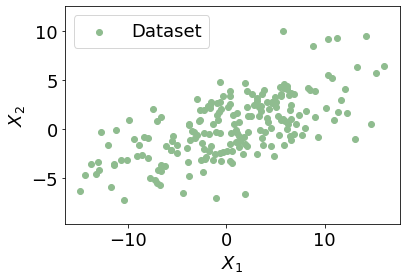

In [4]:
# Note we have three input features but are only going to plot the data
# as a function of the first two input columns

plt.scatter(X[:, 0], X[:, 1],color='darkseagreen')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Dataset'])
plt.axis('equal');

Now we will implement the PCA algorithm and search for $n=3$ principal components which are orthogonal and best represent our dataset. Have a look at the scikit-learn [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function and test it out. 

In [17]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Define the PCA object for 3 components
pca = PCA(n_components=3)

# Fit the PCA object to ... ?
pca.fit(X_scaled)

# Print the PCA components and explained variance
print("PCA components:\n", pca.components_)
print("PCA proportion of variance explained:\n", pca.explained_variance_)




PCA components:
 [[-0.63679826 -0.48688087 -0.59785867]
 [-0.19659024  0.85230237 -0.48469883]
 [-0.74554695  0.19112219  0.63846069]]
PCA proportion of variance explained:
 [2.42118583e+00 5.93400997e-01 4.88554753e-04]


In [16]:
# Check that your components are normalized to 1

print(sum(pca.components_**2))

for p in pca.components_:
    print(np.linalg.norm(p))

[0.44415975 0.96347231 0.59236794]
0.9999999999999998
1.0


Now run the above for `n_components=2` do the PCAs change?

In [15]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

print("PCA components:\n", pca.components_)
print("PCA proportion of variance explained:\n", pca.explained_variance_)

PCA components:
 [[-0.63679826 -0.48688087 -0.59785867]
 [-0.19659024  0.85230237 -0.48469883]]
PCA proportion of variance explained:
 [2.42118583 0.593401  ]


### 1.4 Proportion of Variance explained

What is the **proportion of variance explained (PVE)**?

Let's create a plot of the explained variance (y-axis) as a function of the principal components (x-axis). What trend do you see? What does it show you about your principal components? For the principal components we can use [1,2,3]

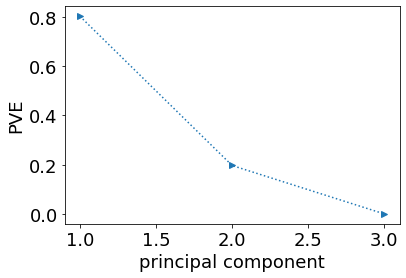

In [18]:
plt.plot([1,2,3], pca.explained_variance_ratio_,':>')
plt.xlabel('principal component')
plt.ylabel('PVE')
plt.show()

The PVE tells us how much of the total variance in the $X$ data is explained by each component! The larger it is the more it describes the data.

From here it is clear that we might be ok with simply taking two input features to represent our data!

**Time to plot the components!**

Let's go back to two input features and look at the PCAs

In [27]:
# Generating new data
rng = np.random.RandomState(seed=42)
X_2 = np.dot(rng.rand(2, 2)*10, rng.randn(2, 200)*2).T
print(X_2.shape)
# Scale data
scaler = StandardScaler()
scaler.fit(X_2)
X_2_scaled = scaler.transform(X_2)
# Calling PCA 
pca_2 = PCA(n_components=2)
pca_2.fit(X_2_scaled)
pca_2.explained_variance_
pca_2.components_

(200, 2)


array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [22]:
# We define a function to draw two vectors
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='purple')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

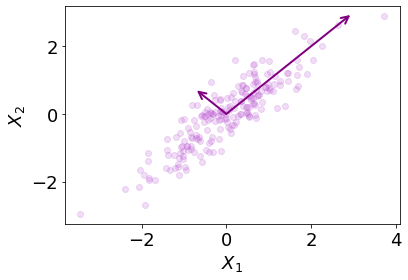

In [25]:
# We can scatter plot the data and plot the vectors
plt.scatter(X_2_scaled[:, 0], X_2_scaled[:, 1], alpha=0.2, color='mediumorchid')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
for length, vector in zip(pca_2.explained_variance_, pca_2.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca_2.mean_, pca_2.mean_ + v)

Let's look at the `explained_variance_ratio_`

In [28]:
pca_2.explained_variance_ratio_

array([0.94646472, 0.05353528])

PCA can become **expensive to calculate**, especially as the data set size grows 

**Advice:**
* Go slow and use a subset of your data (if you have many points) 
* Use PCA as a guide and as an exploratory tool 
* Constantly interrogate the results and ask if they make sense! 



## 2. K-means clustering

### The K-means method and algorithm

While PCA searches for a low dimensional representation of the dataset, Clustering methods search for homogeneous subgroups among the observations.

In K-means clustering, we define a desired number of clusters _K_ and assign each observation to one of the clusters.

**Rules:** 
* Each observation must be placed in at least one of the clusters
* No clusters may overlap, each observation can only be placed in a single cluster 
* The goal is to minimize the variance of observations within each of the clusters 


**Algorithm:**

Choose a values for your number of clusters _K_:

   * At random select _K_ points from your dataset and assign those to be *centroids*, cluster centers
   * Assign each data point to the closest centroid (use the Euclidean distance)
   * Re-compute the centroids using the currently assigned clusters
   * If a convergence criterion is not met, repeat steps 2 and  3

This algorithm corresponds to solving the problem

$$\underset{C_{1},...,C_{K}}{\text{minimize}}\sum_{j=1}^K\sum_{{\bf x}\in {\bf C}_j}d({\bf x},{\bf m}_j)^2$$

with 

$d({\bf x},{\bf m}_j)$ the Euclidean distance between data point x
and centroid $m_j$, $C_j$ the $j-$th cluster, and $m_j$
is the centroid of cluster $C_j$ i.e. the mean vector of all the
data points in $C_j$




### 2.1 K-means from scratch

Let's implement it from scratch (following this [tutorial](https://towardsdatascience.com/a-complete-k-mean-clustering-algorithm-from-scratch-in-python-step-by-step-guide-1eb05cdcd461))

First we will generate data, note that while we are generating $y$ - **the algorithm will never see it or know of its existence (unsupervised!)**

In [32]:
X, y = make_blobs(n_features=2, n_samples=970, centers=3, cluster_std=4.0, random_state=53123)

print(X)

[[-2.73202595 -2.84870652]
 [-0.45051537  5.46209674]
 [ 1.22481118 -2.2175353 ]
 ...
 [-0.43310999  3.33405396]
 [-1.40956313 -4.92669457]
 [-3.73983711 10.62216455]]


Now we randomly select some examples in X as our centroids

In [47]:
# We select 3 indices randomly using random.sample
init_centroid_indices = random.sample(range(0, len(X)), 10)

print(init_centroid_indices)

[956, 89, 740, 143, 240, 845, 931, 633, 625, 489]


In [48]:
# Now we use the indices to define the values of our centroids in terms of X
centroids = []
for i in init_centroid_indices:
    centroids.append(X[i])
centroids = np.array(centroids)

print(centroids)

[[-2.72582766 -2.13682271]
 [-2.37094743  4.23823559]
 [-0.47690619  2.21379887]
 [-1.44238409  2.84648728]
 [-0.48194929  0.50010201]
 [-4.60521659 -3.59700467]
 [-7.44449402 -2.02449785]
 [ 0.47439217  0.25861907]
 [-7.09505703  2.38315088]
 [-9.50709735  5.7120588 ]]


Let's define a function to compute the Euclidean distance

In [49]:
def eucl_dist(X1, X2):
    return np.sqrt(sum((X1 - X2)**2))

Complete the `assigned_centroids` function below. It aims to assign the centroid each point X belongs to, based on its distance the points in each centroid.

In [50]:
def assign_centroids(centroids, X):
    assigned_centroids = []
    for xi in X:
        distance = []
        for Cj in centroids:
            # Complete here - fill out the eucledian distance of each point to the centroid
            distance.append(eucl_dist(xi, Cj))
           # print(distance)
        # From the distances choose the assigned centrois
        assigned_centroids.append(np.argmin(distance))
    return assigned_centroids

In [51]:
# Call your function ot assign the centroids and save the assigned centroids

# Call your function ot assign the centroids and save the assigned centroids
assigned_centroids = assign_centroids(centroids, X)

# Print your centroids .. what does it all mean?
print(len(assigned_centroids))

print(assigned_centroids)
# Print your centroids .. what does it all mean?




970
[0, 1, 7, 3, 1, 8, 2, 7, 1, 9, 2, 2, 1, 9, 7, 6, 9, 5, 1, 1, 5, 7, 6, 9, 8, 5, 2, 9, 5, 5, 5, 1, 3, 1, 8, 7, 7, 1, 4, 9, 1, 4, 5, 5, 7, 2, 0, 1, 9, 0, 9, 3, 8, 8, 9, 4, 9, 1, 7, 0, 8, 8, 1, 1, 6, 5, 5, 8, 1, 1, 7, 5, 7, 5, 3, 5, 2, 7, 7, 0, 0, 7, 1, 3, 0, 5, 9, 7, 7, 1, 9, 9, 0, 2, 0, 7, 1, 1, 6, 9, 8, 7, 7, 1, 7, 9, 1, 0, 1, 5, 1, 1, 3, 1, 1, 0, 9, 6, 6, 5, 7, 1, 7, 0, 0, 8, 0, 5, 1, 6, 8, 7, 9, 0, 6, 1, 0, 9, 2, 0, 1, 6, 3, 3, 1, 0, 3, 0, 2, 0, 6, 0, 9, 3, 1, 0, 1, 1, 6, 7, 1, 1, 9, 0, 0, 5, 5, 7, 6, 5, 8, 1, 0, 2, 0, 2, 5, 1, 5, 5, 0, 0, 6, 8, 0, 1, 0, 7, 4, 3, 2, 3, 1, 0, 2, 3, 1, 9, 1, 1, 9, 6, 0, 0, 7, 4, 0, 1, 1, 1, 1, 5, 1, 1, 7, 1, 9, 1, 1, 1, 0, 1, 8, 7, 8, 5, 6, 8, 6, 9, 1, 1, 1, 7, 0, 1, 0, 1, 3, 1, 4, 9, 9, 5, 2, 1, 1, 2, 7, 0, 9, 1, 2, 1, 9, 1, 9, 6, 3, 0, 0, 1, 7, 9, 9, 0, 2, 1, 0, 9, 3, 2, 9, 1, 1, 1, 5, 2, 5, 4, 6, 8, 5, 2, 1, 7, 8, 0, 9, 7, 6, 2, 5, 8, 1, 1, 4, 5, 5, 1, 1, 2, 2, 5, 0, 6, 8, 0, 8, 9, 9, 5, 0, 1, 1, 9, 7, 1, 2, 7, 6, 1, 9, 1, 3, 1, 2, 7, 9, 9, 5, 5,

Last function to implement is one to update the centroids based on the mean for features in each assigned centroid

In [52]:
def update_centroids(clusters, X):
    new_centroids = []
    # We define a dataframe which include the X data and the clusters
    df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(df['cluster']):
        # Now we compute mean of each cluster
        current_cluster = df[df['cluster'] == c][df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        # And update the position of the centroids based on the mean
        new_centroids.append(cluster_mean)
    return new_centroids

Let's see what this looks like in a plot

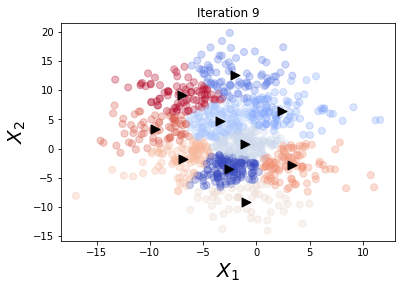

In [53]:
%matplotlib inline
import time
import pylab as pl
from IPython import display

# For 10 iterations we will
for i in range(10):
    
    # Assign centroids
    assigned_centroids = assign_centroids(centroids, X)
    
    # Update the centroids using the means
    centroids = update_centroids(assigned_centroids, X)
    
    print("iteration ", i)
    for ct in centroids:
        print(str(ct[0]) +", "+str(ct[1]) )
    
    pl.clf()
    pl.scatter(X[:, 0], X[:, 1], alpha=0.3, c=assigned_centroids, s=50, cmap='coolwarm')
    pl.scatter(np.array(centroids)[:, 0], 
               np.array(centroids)[:, 1], 
               marker='>', color='black', s=80)
    pl.title('Iteration '+str(i))
    pl.xlabel('$X_1$', fontsize=20)
    pl.ylabel('$X_2$', fontsize=20)
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(2.0)

     





In [43]:
# Let's print the centroids
for ct in centroids:
        print(str(ct[0]) +", "+str(ct[1]) )

-3.5192016583570114, 8.273641852560377
-5.26176939571219, -1.8170086455558394
1.3250025592559063, -1.0572681767141967


## K-Means with `sklearn` 

Now let's try the same thing with the sklearn `KMeans` [class](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [44]:
# Define your K-Means object
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
# Fit your K-Means object to your ?? data

In [46]:
# Print your labels
kmeans.labels_

array([2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2,
       0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2,
       2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2,
       1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0,
       0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 0,
       1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2,
       0, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1,

In [45]:
# Print your kmeans clusters
kmeans.cluster_centers_

array([[-6.59154298,  2.05978782],
       [-1.69862712,  8.56373192],
       [-0.57150453, -3.04212736]])

In [ ]:
# Compare to the method we used above


Try it out with a different number of clusters!